<a href="https://colab.research.google.com/github/R-Owino/FINANCIAL-INCLUSION-IN-EA/blob/feature/Moringa_Data_Science_Core_W2_Independent_Project_2022_03_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

### i. Specifying the question
How we can predict which individuals are most likely to have or use a bank account and which factors influence their having/using or not having/not using a bank account?

### ii. Defining the metric for success
Perform analysis and find individuals who are most likely to have or use a bank account by designing a model with 84% and above accuracy prediction. 

### iii. Understanding the context
Financial inclusion is the availability and equality of opportunities to access financial services. In this problem, we will see and understand demographic factors that drive an individual to having or using a bank account.

### iv. Experimental design
- Load and read the dataset.
- Perform data wrangling on the dataset. 
- Do a univariate analysis.
- Do a bivariate analysis.
- Do a multivariate analysis.
- Implement the solution.
- Challenge the solution. 

### v. Data relevance

### vi. Hypothese
- Null, H0: Demographic factors such as marital status, level of education,  type of job and age influence a person having/using a bank account.
- Alternative, H1: Demographic factors such as marital status, level of education,  type of job and age does not influence a person having/using a bank account.

# 2. Dealing with outliers, anomalies, and missing data within the dataset

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from importlib import reload
reload(plt)

pd.options.mode.chained_assignment = None 

### Loading and previewing the dataset

In [3]:
# Financial dataset

df = pd.read_csv('http://bit.ly/FinancialDataset')

In [4]:
# Determining the no. of records in our dataset

print('Rows are ' + str(df.shape[0]) + ' and columns are ' + str(df.shape[1]))

Rows are 23524 and columns are 13


In [5]:
# Previewing the top of our dataset

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
#
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
# Variable definitions dataset


var = pd.read_csv('http://bit.ly/VariableDefinitions')
pd.set_option("display.max_rows", None, "display.max_columns", None)
var

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### Tidying the dataset 

In [9]:
# Renaming the columns
# replacing spaces with _ so that the column names with spaces are one worded and in lower case

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   has_a_bank_account      23488 non-null  object 
 4   type_of_location        23509 non-null  object 
 5   cell_phone_access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   respondent_age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   the_relathip_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  level_of_educuation     23495 non-null  object 
 12  type_of_job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


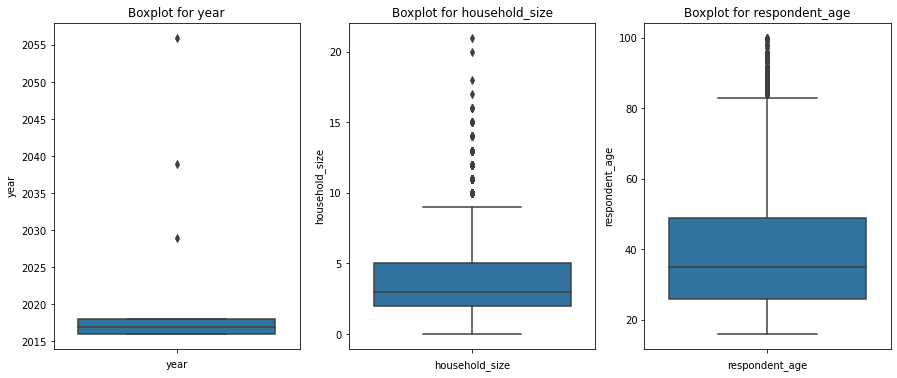

In [11]:
# Checking for outliers

columns = ['year', 'household_size', 'respondent_age']
fig, ax = plt.subplots(ncols = len(columns), figsize = (15, 6))

for i, column in enumerate(columns):
  sns.boxplot(y = df[column], ax = ax[i])
  ax[i].set_title('Boxplot for {}'.format(column))
  ax[i].set_xlabel(column)

plt.show()

In [12]:
# Checking for Anomalies


# The outliers in the year column need to be dropped because they don't cover the
# scope of our analysis

# To do this, first identify which years these are then drop the records with those years

# identifying the outlier years 
df['year'].unique()

# removing the unwanted entries
df1 = df[~((df.year == 2029) | (df.year == 2039) | (df.year == 2056))] 

# making sure that the years are what we are dealing with
df1['year'].unique()

array([2018, 2016, 2017])

The outliers in the household size and respondent age columns are not being removed because they are critical to the analysis.

In [13]:
# Checking and dealing with duplicates
df1.duplicated().sum()

0

In [14]:
# Handling missing values:

# finding the sum of all missing values
df1.isnull().sum()


country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [15]:
# dropping all missing values
df1.dropna(inplace = True)

df1.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [16]:
# Changing the datatypes of household size and respondent age to integer and year to string 

df1[['household_size', 'respondent_age']] = df1[['household_size', 'respondent_age']].apply(np.int64)
df1['year']= df1['year'].map(str)
df1.dtypes

country                   object
year                      object
uniqueid                  object
has_a_bank_account        object
type_of_location          object
cell_phone_access         object
household_size             int64
respondent_age             int64
gender_of_respondent      object
the_relathip_with_head    object
marital_status            object
level_of_educuation       object
type_of_job               object
dtype: object

In [17]:
# Getting all the unique values in the dataset
for col in df1:
  print(df1[col].unique(), '\n')

['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

['2018' '2016' '2017'] 

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759'] 

['Yes' 'No'] 

['Rural' 'Urban'] 

['Yes' 'No'] 

[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21  0 18 17 20] 

[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100] 

['Female' 'Male'] 

['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives'] 

['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know'] 

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6'] 

['Self employed

In [18]:
# Dropping unnecessary columns

fin_inc = df1.drop(['uniqueid', 'the_relathip_with_head', 'marital_status'], axis=1)
fin_inc.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Primary education,Informally employed


# 3. Performing univariate, bivariate and multivariate analyses. 

# Univariate analysis

Categorical variables

In [19]:
# Frequency table to show the number of has or has no bank account 

number_of_responses = pd.DataFrame(fin_inc.has_a_bank_account.value_counts())
number_of_responses

,has_a_bank_account
No,20044
Yes,3296


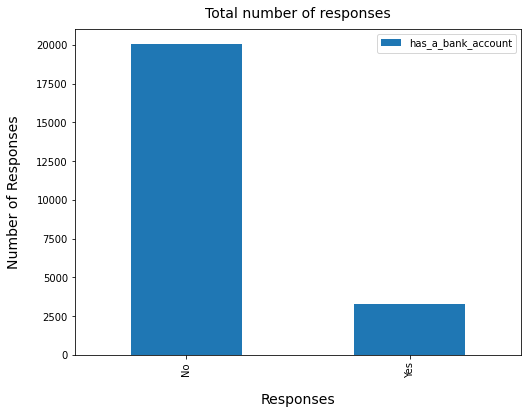

In [20]:
# Bar chart that show the number of responses

number_of_responses[['has_a_bank_account']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Giving our chart a title
plt.title("Total number of responses", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Number of Responses", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Responses", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

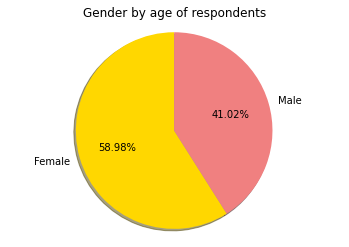

In [21]:
# Pie chart showing the percentage of males and females by age

gender_analysis = fin_inc.groupby(['gender_of_respondent'])['respondent_age'].count()
gender_analysis


colors = ['gold', 'lightcoral']


plt.pie(gender_analysis, labels = gender_analysis.index, autopct = '%2.2f%%', colors = colors, shadow = True, startangle = 90)

plt.axis('equal')
plt.title('Gender by age of respondents')
plt.show()

1. Numerical variables

Measures of central tendency

In [22]:
# Average of ages 
round(fin_inc['respondent_age'].mean())

39

In [23]:
# Mode of ages
fin_inc['respondent_age'].mode()

0    30
dtype: int64

In [24]:
# Median of ages
fin_inc['respondent_age'].median()

35.0

In [25]:
# Average of household sizes
round(fin_inc['household_size'].mean())

4

In [26]:
# Mode of household sizes
fin_inc['household_size'].mode()

0    2
dtype: int64

In [27]:
# Median of household sizes
fin_inc['household_size'].median()

3.0

Measures of dispersion

In [28]:
# Standard Deviation of ages
fin_inc['respondent_age'].std()

# The coefficient of variation is less than 1, this means that the data points are close to the mean of respondents' age

16.519904564514412

In [29]:
# coefficient of variation
fin_inc['respondent_age'].std() / round(fin_inc['respondent_age'].mean())

0.42358729652601057

In [30]:
# Variance of ages 
fin_inc['respondent_age'].var()

# There is a high variance, this means that the data has very large dis-similarities amongst its members

272.90724682066417

In [31]:
fin_inc['respondent_age'].var() / round(fin_inc['respondent_age'].mean())

6.997621713350363

In [32]:
# Skewness of ages
fin_inc['respondent_age'].skew()

# The respondents' age is positively skewed and skewed to the right because mean is greater than mode.

0.8406145812311228

In [33]:
# Kurtosis of ages 
fin_inc['respondent_age'].kurt()

# This kurtosis is Platykurtic (thinner tail)

0.09826807013177241

In [34]:
# Quartiles range of ages 
fin_inc['respondent_age'].quantile([0.25,0.5,0.75])

# First quartile (Q1) is median of upper half of the data. 
# Second quartile (Q2) is median of the whole data. 
# And Third Quartile (Q3) is median of lower half of the data.

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [35]:
# Range of ages
max_age = fin_inc['respondent_age'].max()
min_age = fin_inc['respondent_age'].min()

age_range = max_age - min_age
age_range

# This is the difference between the highest and the lowest value in the respondents' age column 

84

In [36]:
# Standard Deviation of household size
fin_inc['household_size'].std()

# The coefficient of variation is less than 1, this means that the data points are close to the mean of household size

2.2812745975350435

In [37]:
# Coefficient of variation
fin_inc['household_size'].std() / round(fin_inc['household_size'].mean())

0.5703186493837609

In [38]:
# Variance of household size
fin_inc['household_size'].var()

# There is a high variance, this means that the data has very large dis-similarities amongst its members

5.204213789358675

In [39]:
# coefficient of variation 
fin_inc['household_size'].var() / round(fin_inc['household_size'].mean())

1.3010534473396687

In [40]:
# Skewness of household size
fin_inc['household_size'].skew()

# Household size is positively skewed and skewed to the right because mean is greater than mode.

0.9741827150450616

In [41]:
# Kurtosis of household size
fin_inc['household_size'].kurt()

# This kurtosis is Leptokurtic (thicker tail)

1.1538357462528523

In [42]:
# Quartiles of household size
fin_inc['household_size'].quantile([0.25,0.5,0.75])

# First quartile (Q1) is median of upper half of the data. 
# Second quartile (Q2) is median of the whole data. 
# And Third Quartile (Q3) is median of lower half of the data.

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [43]:
# Range of household size
max_size = fin_inc['household_size'].max()
min_size = fin_inc['household_size'].min()

size_range = max_size - min_size
size_range

# This is the difference between the highest and the lowest value in the household size column 

21

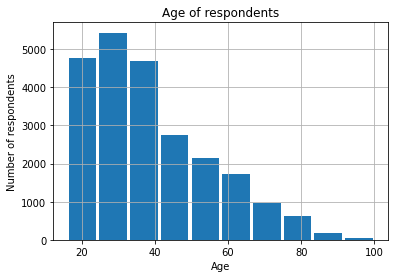

In [44]:
# Plotting the histogram for the respondents' age

fin_inc.hist('respondent_age', bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Age of respondents') 
plt.show()

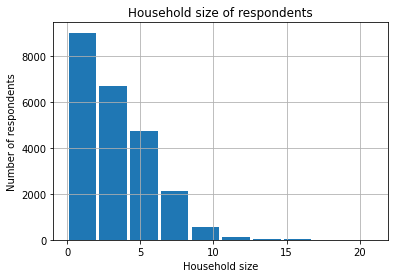

In [45]:
# Plotting the histogram for the household size

fin_inc.hist('household_size', bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('Household size')
plt.ylabel('Number of respondents')
plt.title('Household size of respondents') 
plt.show()

# Bivariate analysis

Numerical and Numerical

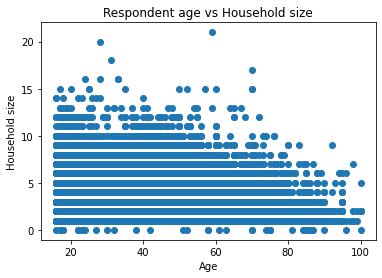

In [46]:
# Scatter plot for household size and respondents' age

plt.scatter(fin_inc['respondent_age'], fin_inc['household_size'])

plt.title('Respondent age vs Household size')

plt.xlabel('Age')

plt.ylabel('Household size')

plt.show()

# There is a relation between age of the respondent and household size

In [47]:
# Correlation for household size and respondents' age
corr_ = fin_inc['respondent_age'].corr(fin_inc['household_size'])
corr_
# There is a weak correlation between respondent's age and household size

-0.11967115234154871

Text(0.5, 1.0, 'Correlation matrix showing the relation between respondents age and houshold size')

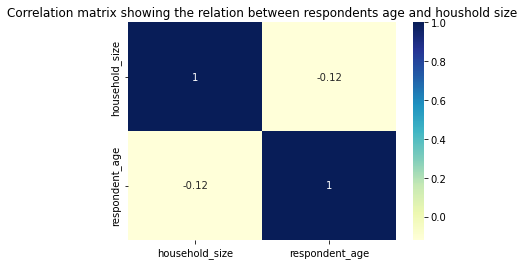

In [57]:
# Plotting a correlar=tion matrix 
corr_ = fin_inc.corr()
sns.heatmap(corr_, cmap="YlGnBu", annot=True)
plt.title('Correlation matrix showing the relation between respondents age and houshold size')

## Multivariate analysis 

In [56]:
fin_inc.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Primary education,Informally employed


Principle Component Analysis

In [60]:
# Dividing the dataset into a feature set and corresponding labels.
# This script stores the feature sets into the x variable and the series of corresponding labels in to the y variable.

X = fin_inc.drop('has_a_bank_account', axis = 1)
y = fin_inc.iloc[:, 2]

In [61]:
# To perform PCA, we need to convert all categorical variables to numerical

X = pd.get_dummies(X)

In [62]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [64]:
# Performing a standard scalar normalization to normalize the feature set. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [66]:
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.46015289e-01, 1.00522665e-01, 7.67780948e-02, 5.83288995e-02,
       5.72536025e-02, 4.83116679e-02, 4.74864691e-02, 4.07510538e-02,
       3.89875017e-02, 3.58392973e-02, 3.26797073e-02, 3.23919515e-02,
       3.22504017e-02, 3.17631310e-02, 3.10700997e-02, 3.09742988e-02,
       3.00487107e-02, 2.88984550e-02, 2.62989867e-02, 2.24482649e-02,
       1.93094761e-02, 1.70156888e-02, 1.45762870e-02, 1.02843903e-31,
       4.08766813e-33, 1.95561782e-33, 1.34171681e-33, 1.03506485e-33,
       9.65764949e-34, 9.65764949e-34, 9.65764949e-34, 5.39659738e-34])

In [67]:
# Using 1 princpal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [68]:
#  Training model and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [69]:
# Evaluating the performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


From the random classifier, an accuracy of 86.46% is got. This result is using a random component, which is not known.

In [70]:
# Applying the PCA concept to pin down a factor:

# getting the length of the columns:
len(X.columns)

32

In [71]:
import warnings

warnings.filterwarnings("ignore")
accuracy = {}

for i in range(1, 32):
  
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  accuracy.update({'comp-n ' + str(i) : 'accuracy' + str(acc*100)})
  
accuracy

{'comp-n 1': 'accuracy86.18680377035133',
 'comp-n 10': 'accuracy87.21508140531277',
 'comp-n 11': 'accuracy87.24935732647815',
 'comp-n 12': 'accuracy86.87232219365896',
 'comp-n 13': 'accuracy86.73521850899742',
 'comp-n 14': 'accuracy86.83804627249357',
 'comp-n 15': 'accuracy86.73521850899742',
 'comp-n 16': 'accuracy86.88946015424165',
 'comp-n 17': 'accuracy87.04370179948586',
 'comp-n 18': 'accuracy86.7866323907455',
 'comp-n 19': 'accuracy86.75235646958012',
 'comp-n 2': 'accuracy86.32390745501284',
 'comp-n 20': 'accuracy86.7866323907455',
 'comp-n 21': 'accuracy86.75235646958012',
 'comp-n 22': 'accuracy86.66666666666667',
 'comp-n 23': 'accuracy86.4438731790917',
 'comp-n 24': 'accuracy86.99228791773778',
 'comp-n 25': 'accuracy86.59811482433591',
 'comp-n 26': 'accuracy86.8037703513282',
 'comp-n 27': 'accuracy86.64952870608398',
 'comp-n 28': 'accuracy86.4438731790917',
 'comp-n 29': 'accuracy86.83804627249357',
 'comp-n 3': 'accuracy86.20394173093402',
 'comp-n 30': 'accu

In [72]:
# Finding the component with the highest accuracy

maximum = max(accuracy, key=accuracy.get)
print(maximum, accuracy[maximum])

# component 11 with an accuracy of 87%

comp-n 11 accuracy87.24935732647815


In [73]:
# Seeing which component it is
X.columns[11]

'cell_phone_access_No'

#### From the analysis above, we accept the null hypothesis which states that different demographic factors affect an individual having or using a bank account.